# JUST TO PREDICT THE NEXT DAY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
from jupyterthemes import jtplot
jtplot.style()

https://www.youtube.com/watch?v=GFSiL6zEZF0 <br>
if you have problem with numpy, downgrade to np version 1.19.5
#pip install numpy ==1.19.5

# Determine Currency, Get the Data

In [2]:
crypto_currency = 'XRP'
against_currency = 'USD'

In [4]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [5]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)

# Feature Scaling

In [7]:
#Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [10]:
prediction_days = 60 

# Determine x_train and y_train

In [12]:
x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0]) #0 in the first iteration, then 1, 2,3 
    y_train.append(scaled_data[x,0]) # the day after the last day of x
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) #1 is how many column

# Create NN model

In [14]:
#Create a Neural Network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
60/60 [==============================] - 2s 34ms/step - loss: 0.0039
Epoch 2/25
60/60 [==============================] - 2s 34ms/step - loss: 0.0022
Epoch 3/25
60/60 [==============================] - 2s 36ms/step - loss: 0.0017
Epoch 4/25
60/60 [==============================] - 2s 33ms/step - loss: 0.0014
Epoch 5/25
60/60 [==============================] - 2s 33ms/step - loss: 0.0012
Epoch 6/25
60/60 [==============================] - 2s 33ms/step - loss: 0.0012
Epoch 7/25
60/60 [==============================] - 2s 33ms/step - loss: 0.0010
Epoch 8/25
60/60 [==============================] - 2s 33ms/step - loss: 0.0011
Epoch 9/25
60/60 [==============================] - 2s 35ms/step - loss: 0.0011
Epoch 10/25
60/60 [==============================] - 2s 35ms/step - loss: 7.5321e-04
Epoch 11/25
60/60 [==============================] - 2s 34ms/step - loss: 7.2477e-04
Epoch 12/25
60/60 [==============================] - 2s 34ms/step - loss: 6.5057e-04
Epoch 13/25
60/60 [======

# Test the Model

In [15]:
#testing the model
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

In [16]:
total_dataset = pd.concat((data['Close'], test_data['Close']),axis=0)

In [18]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
#all the values minus test data minus 60 days for the predictions,
#we get these values as inputs since we want to predict values after that.

In [19]:
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

In [21]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [22]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)
prediction_prices

array([[ 1.4795916 ],
       [ 1.2094656 ],
       [ 0.8330322 ],
       [ 0.49131894],
       [ 0.22498968],
       [ 0.03996821],
       [-0.06518004],
       [-0.09864302],
       [-0.07390666],
       [-0.00990393],
       [ 0.07219058],
       [ 0.15109815],
       [ 0.21128479],
       [ 0.24497703],
       [ 0.25623092],
       [ 0.25121826],
       [ 0.2364759 ],
       [ 0.21978797],
       [ 0.20656852],
       [ 0.19808175],
       [ 0.19424604],
       [ 0.19497143],
       [ 0.19907911],
       [ 0.20380749],
       [ 0.20745364],
       [ 0.20927836],
       [ 0.21089315],
       [ 0.21288821],
       [ 0.21612957],
       [ 0.21982852],
       [ 0.2242299 ],
       [ 0.22811174],
       [ 0.23106062],
       [ 0.23409289],
       [ 0.23766138],
       [ 0.24295329],
       [ 0.2506579 ],
       [ 0.2600198 ],
       [ 0.26877323],
       [ 0.2750191 ],
       [ 0.27884078],
       [ 0.27933016],
       [ 0.27791774],
       [ 0.27908048],
       [ 0.28641662],
       [ 0

# Plot Prediction vs Actual

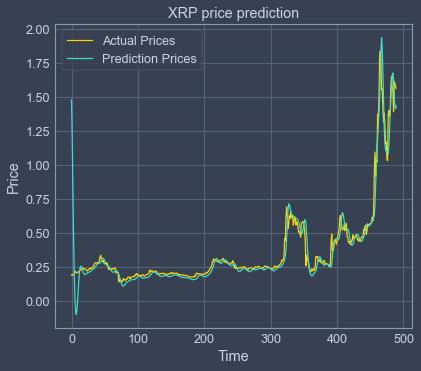

In [28]:
plt.plot(actual_prices, color='gold',label='Actual Prices')
plt.plot(prediction_prices, color='turquoise',label='Prediction Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

The model looks at 60 days and then predicted just 1 day after. 
The model then looks at another 60 days and then predicted the day after.
That's why the model looks good.

# Predict the next day

In [29]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs) +1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

In [31]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
prediction

array([[1.4797609]], dtype=float32)

# We can target the 90th day instead of the 61st day.

Epoch 1/25
58/58 [==============================] - 2s 34ms/step - loss: 0.0099
Epoch 2/25
58/58 [==============================] - 2s 32ms/step - loss: 0.0089
Epoch 3/25
58/58 [==============================] - 2s 34ms/step - loss: 0.0085
Epoch 4/25
58/58 [==============================] - 2s 32ms/step - loss: 0.0084
Epoch 5/25
58/58 [==============================] - 2s 32ms/step - loss: 0.0085
Epoch 6/25
58/58 [==============================] - 2s 31ms/step - loss: 0.0085
Epoch 7/25
58/58 [==============================] - 2s 31ms/step - loss: 0.0085
Epoch 8/25
58/58 [==============================] - 2s 32ms/step - loss: 0.0085
Epoch 9/25
58/58 [==============================] - 2s 31ms/step - loss: 0.0083
Epoch 10/25
58/58 [==============================] - 2s 32ms/step - loss: 0.0084
Epoch 11/25
58/58 [==============================] - 2s 31ms/step - loss: 0.0083
Epoch 12/25
58/58 [==============================] - 2s 31ms/step - loss: 0.0084
Epoch 13/25
58/58 [==================

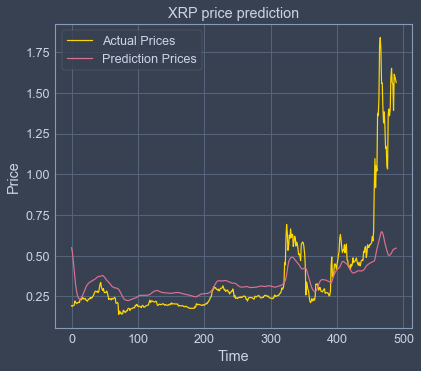

In [34]:
future_day = 60

x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x, 0]) #0 in the first iteration, then 1, 2,3 
    y_train.append(scaled_data[x+future_day,0]) # the day after the last day of x
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) #1 is how many column

#Create a Neural Network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

#testing the model
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']),axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
#all the values minus test data minus 60 days for the predictions,
#we get these values as inputs since we want to predict values after that.

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)
prediction_prices

plt.plot(actual_prices, color='gold',label='Actual Prices')
plt.plot(prediction_prices, color='palevioletred',label='Prediction Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()